In [267]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statistics
from scipy.stats import norm, kstest

# ANOVA TESTS

The assumptions for implementing one way ANOVA include:
- The normality criterion: each group compared should come from a population following the normal distribution.
- The variance criterion (or 'homogeneity of variances'): samples should come from populations with the same variance.
- Independent samples: performance (the dependent variable) in each sample should not be affected by the conditions in other samples.

# Average Check ANOVA test

In [338]:
df1 = pd.read_csv('АноваСреднийЧек.csv', sep=';', encoding='utf-8-sig') 

In [339]:
df1.describe()

,Кластер 1,Кластер 2,Кластер 3,Кластер 4,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,19460.000000,11606.000000,2.545700e+04,9406.000000,0.0,0.0,0.0,0.0,0.0
mean,2629.423895,2596.998018,4.038215e+03,8783.876781,NaN,NaN,NaN,NaN,NaN
std,2117.269388,2432.984477,3.221463e+05,8918.346505,NaN,NaN,NaN,NaN,NaN
min,94.000000,138.000000,6.700000e+01,140.000000,NaN,NaN,NaN,NaN,NaN
25%,1376.000000,1127.000000,8.580000e+02,2804.000000,NaN,NaN,NaN,NaN,NaN
50%,2147.000000,1948.500000,1.497000e+03,5509.000000,NaN,NaN,NaN,NaN,NaN
75%,3213.000000,3219.750000,2.535000e+03,11846.000000,NaN,NaN,NaN,NaN,NaN
max,54827.000000,36871.000000,5.140042e+07,92350.000000,NaN,NaN,NaN,NaN,NaN


### checking test criterions:

In [340]:
Cluster_1 = (df['Кластер 1']).dropna()
Cluster_2 = (df['Кластер 2']).dropna()
Cluster_3 = (df['Кластер 3']).dropna()
Cluster_4 = (df['Кластер 4']).dropna()

In [341]:
Cluster_1

0        2799.0
1        5216.0
2        2236.0
3        2405.0
4        2297.0
          ...  
19455    1448.0
19456    3849.0
19457     826.0
19458    1809.0
19459    2094.0
Name: Кластер 1, Length: 19460, dtype: float64

In [296]:
stat, p = stats.normaltest(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=21106.866, p=0.000
Sample does not look Gaussian (reject H0)


In [297]:
result = stats.anderson(Cluster_1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 989.067
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [298]:
stat, p = stats.shapiro(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.707, p=0.000
Sample does not look Gaussian (reject H0)


In [299]:
print(stats.kstest(Cluster_1, 'norm'))
print(stats.kstest(Cluster_2, 'norm'))
print(stats.kstest(Cluster_3, 'norm'))
print(stats.kstest(Cluster_4, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


Sample does not look Gaussian (reject H0)

### computing histograms for data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de22320>]],
      dtype=object)

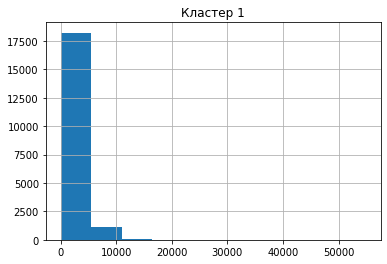

In [301]:
df1.hist(column='Кластер 1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de18e48>]],
      dtype=object)

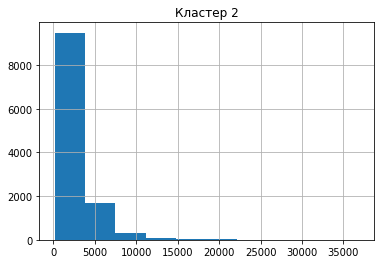

In [302]:
df1.hist(column='Кластер 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de18f60>]],
      dtype=object)

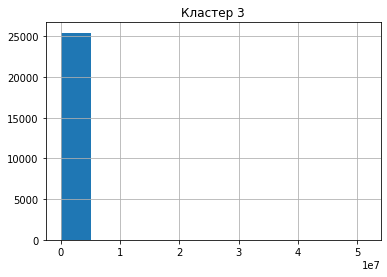

In [303]:
df1.hist(column='Кластер 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e2d0978>]],
      dtype=object)

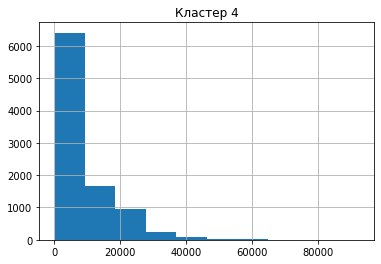

In [304]:
df1.hist(column='Кластер 4')

### One-way ANOVA TEST

In [305]:
F, p = stats.f_oneway(Cluster_1, Cluster_2, Cluster_3, Cluster_4)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 2.283 and probability p = 0.077


As p > a (0.05) we state that we do not have a main interaction effect. This simply means that amongst group comparison identifies statistically insignificant differences. 

# Average Number of goods ANOVA test

In [280]:
df2 = pd.read_csv('АноваКолТоваров.csv', sep=';', encoding='utf-8-sig') 

In [281]:
df2.describe()

,Кластер 1,Кластер 2,Кластер 3,Кластер 4
count,19460.000000,11606.000000,25456.000000,9406.000000
mean,3.763052,3.992245,2.511746,1.446949
std,4.671282,4.459336,3.280464,1.730025
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000
75%,4.000000,5.000000,3.000000,1.000000
max,72.000000,90.000000,70.000000,46.000000


In [282]:
Cluster_1 = (df2['Кластер 1']).dropna()
Cluster_2 = (df2['Кластер 2']).dropna()
Cluster_3 = (df2['Кластер 3']).dropna()
Cluster_4 = (df2['Кластер 4']).dropna()

### checking test criterions:

In [288]:
stat, p = stats.normaltest(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=16668.271, p=0.000
Sample does not look Gaussian (reject H0)


In [290]:
result = stats.anderson(Cluster_1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2162.800
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [291]:
stat, p = stats.shapiro(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.602, p=0.000
Sample does not look Gaussian (reject H0)


In [277]:
print(stats.kstest(Cluster_1, 'norm'))
print(stats.kstest(Cluster_2, 'norm'))
print(stats.kstest(Cluster_3, 'norm'))
print(stats.kstest(Cluster_4, 'norm'))

KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)


Sample does not look Gaussian (reject H0)

### computing histograms for data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6e85f8>]],
      dtype=object)

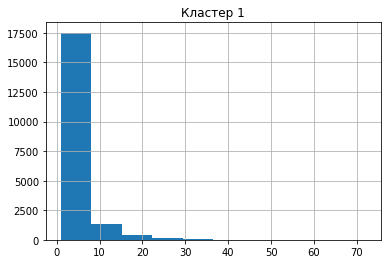

In [278]:
df2.hist(column='Кластер 1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dcb6320>]],
      dtype=object)

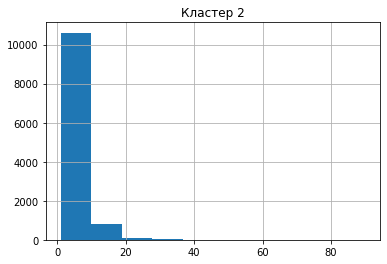

In [279]:
df2.hist(column='Кластер 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdcb828>]],
      dtype=object)

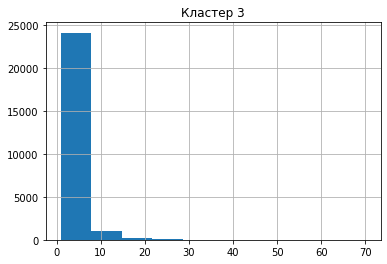

In [216]:
df2.hist(column='Кластер 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce0a400>]],
      dtype=object)

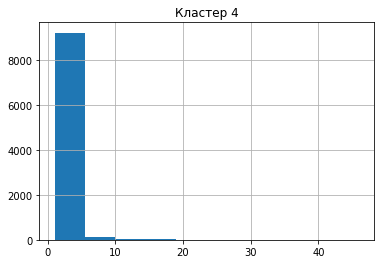

In [217]:
df2.hist(column='Кластер 4')

### One-way ANOVA TEST

In [221]:
F, p = stats.f_oneway(Cluster_1, Cluster_2, Cluster_3, Cluster_4)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 1182.103 and probability p = 0.000


As p < a (0.05) we state that we have a main interaction effect. This simply means that amongst group comparison identifies statistically significant differences. 

# Average Revenue ANOVA test


In [309]:
df3 = pd.read_csv('АноваВыручка.csv', sep=';', encoding='utf-8-sig') 

In [310]:
Cluster_1 = (df3['Кластер 1']).dropna()
Cluster_2 = (df3['Кластер 2']).dropna()
Cluster_3 = (df3['Кластер 3']).dropna()
Cluster_4 = (df3['Кластер 4']).dropna()

In [311]:
df3.describe()

,Кластер 1,Кластер 2,Кластер 3,Кластер 4
count,19460.000000,11606.000000,25456.000000,9406.000000
mean,3686.966393,3460.135620,2151.114629,9535.255688
std,4009.502992,4262.450505,2228.829445,10062.522780
min,26.000000,79.000000,1.000000,120.000000
25%,1451.000000,1134.250000,802.000000,2755.000000
50%,2519.000000,2229.500000,1509.000000,5675.000000
75%,4504.000000,4199.000000,2706.000000,12827.750000
max,99720.000000,71509.000000,51716.000000,117701.000000


### checking test criterions:

In [313]:
stat, p = stats.normaltest(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=21355.326, p=0.000
Sample does not look Gaussian (reject H0)


In [314]:
result = stats.anderson(Cluster_1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1498.659
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [315]:
stat, p = stats.shapiro(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.638, p=0.000
Sample does not look Gaussian (reject H0)


In [316]:
print(stats.kstest(Cluster_1, 'norm'))
print(stats.kstest(Cluster_2, 'norm'))
print(stats.kstest(Cluster_3, 'norm'))
print(stats.kstest(Cluster_4, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.999960716530484, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


Sample does not look Gaussian (reject H0)

### computing histograms for data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3a64e0>]],
      dtype=object)

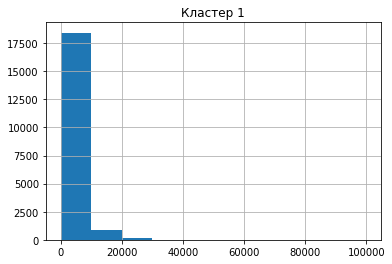

In [317]:
df3.hist(column='Кластер 1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e799208>]],
      dtype=object)

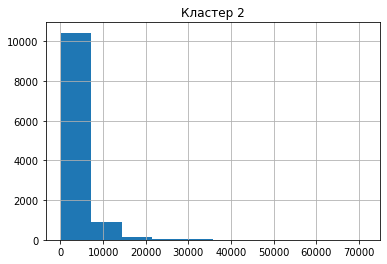

In [318]:
df3.hist(column='Кластер 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d896470>]],
      dtype=object)

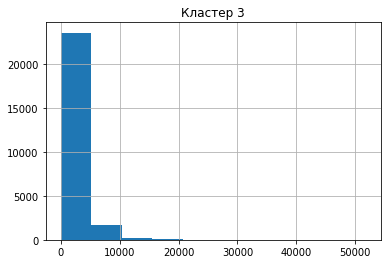

In [319]:
df3.hist(column='Кластер 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3eeda0>]],
      dtype=object)

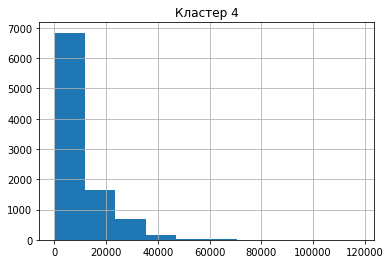

In [320]:
df3.hist(column='Кластер 4')

### one-way ANOVA test

In [322]:
F, p = stats.f_oneway(Cluster_1, Cluster_2, Cluster_3, Cluster_4)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 5206.679 and probability p = 0.000


As p < a (0.05) we state that we have a main interaction effect. This simply means that amongst group comparison identifies statistically significant differences. 

# Average Margin ANOVA test



In [325]:
df4 = pd.read_csv('АноваМаржа.csv', sep=';', encoding='utf-8-sig') 

In [326]:
Cluster_1 = (df4['Кластер 1']).dropna()
Cluster_2 = (df4['Кластер 2']).dropna()
Cluster_3 = (df4['Кластер 3']).dropna()
Cluster_4 = (df4['Кластер 4']).dropna()

In [327]:
df4.describe()

,Кластер 1,Кластер 2,Кластер 3,Кластер 4
count,19460.000000,11606.000000,25456.000000,9406.000000
mean,153.793958,550.355178,319.536149,2756.969115
std,513.281111,710.461446,621.488158,5078.515325
min,-23048.000000,-6940.000000,-15387.000000,-224.000000
25%,53.000000,187.000000,88.000000,699.250000
50%,156.000000,364.000000,214.000000,1449.500000
75%,310.000000,657.375000,437.625000,2979.000000
max,6790.500000,14250.000000,10066.500000,45992.000000


### checking test criterions:


In [328]:
stat, p = stats.normaltest(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=25053.551, p=0.000
Sample does not look Gaussian (reject H0)


In [329]:
result = stats.anderson(Cluster_1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1269.603
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [330]:
stat, p = stats.shapiro(Cluster_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.692, p=0.000
Sample does not look Gaussian (reject H0)


In [331]:
print(stats.kstest(Cluster_1, 'norm'))
print(stats.kstest(Cluster_2, 'norm'))
print(stats.kstest(Cluster_3, 'norm'))
print(stats.kstest(Cluster_4, 'norm'))

KstestResult(statistic=0.8365562013172625, pvalue=0.0)
KstestResult(statistic=0.9630908515911842, pvalue=0.0)
KstestResult(statistic=0.899324079858104, pvalue=0.0)
KstestResult(statistic=0.9979797261062422, pvalue=0.0)


Sample does not look Gaussian (reject H0)

### computing histograms for data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e2d0748>]],
      dtype=object)

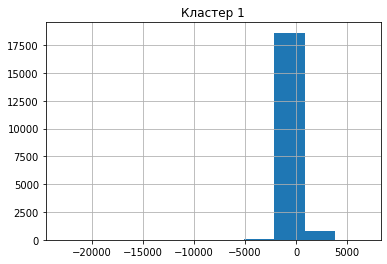

In [332]:
df4.hist(column='Кластер 1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3a6518>]],
      dtype=object)

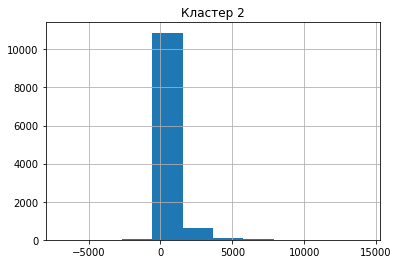

In [333]:
df4.hist(column='Кластер 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f1ce320>]],
      dtype=object)

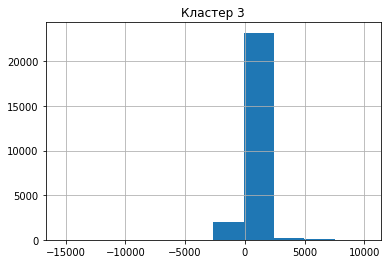

In [334]:
df4.hist(column='Кластер 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f7ece48>]],
      dtype=object)

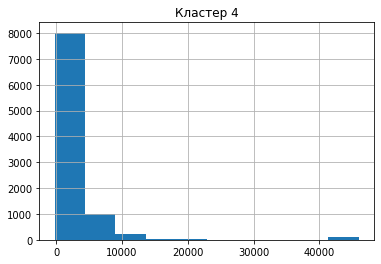

In [335]:
df4.hist(column='Кластер 4')

### one-way ANOVA test

In [336]:
F, p = stats.f_oneway(Cluster_1, Cluster_2, Cluster_3, Cluster_4)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

F statistic = 4124.682 and probability p = 0.000


As p < a (0.05) we state that we have a main interaction effect. This simply means that amongst group comparison identifies statistically significant differences. 